In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
result = pd.read_csv('../data/water/CA-result-withmeasuregroup.csv')
station = pd.read_csv('../data/water/CA-station-clean.csv', low_memory=False)
data = pd.merge(result, station, left_on='LocationIdentifier', right_on='MonitoringLocationId')

sites = pd.DataFrame(np.sort(data.MonitoringLocationType.unique()))
sites['TypeGroup'] = ''
del result
del station

In [3]:
grouped = data.groupby('LocationIdentifier').sum().reset_index()
print(len(grouped))
print(len(grouped[grouped.ExceedsMcl > 0]))

4209
1266


In [4]:
pd.options.display.max_rows = None
sites.columns = ['Type', 'TypeGroup']

sites.loc[sites.Type.str.startswith('BEACH'), 'TypeGroup'] = 'Ocean'
sites.loc[sites.Type.str.startswith('CERCLA'), 'TypeGroup'] = 'Superfund'
sites.loc[sites.Type.str.startswith('Canal'), 'TypeGroup'] = 'Surface'
sites.loc[sites.Type.str.startswith('Facility'), 'TypeGroup'] = 'Facility'
sites.loc[sites.Type.str.startswith('Lake'), 'TypeGroup'] = 'Surface'
sites.loc[sites.Type.str.startswith('Land'), 'TypeGroup'] = 'Surface'
sites.loc[sites.Type.str.startswith('Mine'), 'TypeGroup'] = 'Ground'
sites.loc[sites.Type.str.startswith('Ocean'), 'TypeGroup'] = 'Ocean'
sites.loc[sites.Type.str.startswith('Pipe'), 'TypeGroup'] = 'Facility'
sites.loc[sites.Type.str.startswith('Reservoir'), 'TypeGroup'] = 'Reservoir'
sites.loc[sites.Type.str.startswith('River/Stream'), 'TypeGroup'] = 'Surface'
sites.loc[sites.Type.str.startswith('River/stream'), 'TypeGroup'] = 'Surface'
sites.loc[sites.Type.str.startswith('Stream'), 'TypeGroup'] = 'Surface'
sites.loc[sites.Type.str.startswith('Subsurface'), 'TypeGroup'] = 'Ground'
sites.loc[sites.Type.str.startswith('Well'), 'TypeGroup'] = 'Ground'
sites.loc[sites.Type.str.startswith('Wetland'), 'TypeGroup'] = 'Surface'

sites.loc[sites.Type == 'Atmosphere', 'TypeGroup'] = 'Atmosphere'
sites.loc[sites.Type == 'Estuary', 'TypeGroup'] = 'Estuary'
sites.loc[sites.Type == 'Cave', 'TypeGroup'] = 'Ground'
sites.loc[sites.Type == 'Constructed Water Transport Structure', 'TypeGroup'] = 'Surface'
sites.loc[sites.Type == 'Channelized Stream', 'TypeGroup'] = 'Surface'
sites.loc[sites.Type == 'Other-Ground Water', 'TypeGroup'] = 'Ground'
sites.loc[sites.Type == 'Other-Surface Water', 'TypeGroup'] = 'Surface'
sites.loc[sites.Type == 'Spring', 'TypeGroup'] = 'Ground'

sites.columns = ['MonitoringLocationType', 'TypeGroup']
data = pd.merge(data, sites, on='MonitoringLocationType')

sites[sites.TypeGroup == '']

,MonitoringLocationType,TypeGroup
21,Seep,


In [5]:
mcls = pd.read_csv('../data/water/measuregroup.csv',
                  usecols=['MeasureGroup', 'MCLG', 'MCL'])
mcls.columns = ['Pollutant', 'MCLG', 'MCL']
mcls = mcls[mcls.Pollutant.isin(data.Pollutant.unique())].reset_index(drop=True)
mcls

,Pollutant,MCLG,MCL
0,Antimony,0.006,0.0060
1,Arsenic,0.000,0.0100
2,Barium,2.000,2.0000
3,Beryllium,0.004,0.0040
4,Cadmium,0.004,0.0050
5,Chromium,0.100,0.1000
6,Copper,1.300,1.3000
7,Fluoride,4.000,4.0000
8,HAA5,NaN,0.0600
9,Lead,0.000,0.0150


In [6]:
data.head(2)

,LocationIdentifier,Medium,MediumSubdivision,StartDate,StartTime,TimeZone,Category,Pollutant,Unit,Mclg,Mcl,Value,ExceedsMclg,ExceedsMcl,Comment,WarningLevel,Organization,MonitoringLocationId,MonitoringLocationName,MonitoringLocationType,MonitoringLocationDescription,HUC,DrainageArea,DrainageAreaUnit,ContributingDrainageArea,ContributingDrainageAreaUnit,Latitude,Longitude,VerticalMeasure,VerticalMeasureUnit,StateCode,CountyCode,CountyName,AquiferName,FormationType,AquiferType,Provider,Edits,TypeGroup
0,CEDEN-207SNB006,Water,NaN,2012-04-17,12:50:00,PST,Inorganic,Nitrite,mg/L,1.0,1.0,0.01300,0.0,False,1; 207SNB006-GR,Green,California State Water Resources Control Board,CEDEN-207SNB006,Roe Island,Estuary,NaN,18050001.0,NaN,NaN,NaN,NaN,38.065,-122.035,NaN,NaN,6,95.0,Solano County,NaN,NaN,NaN,STORET,NaN,Estuary
1,CEDEN-207SNB006,Water,NaN,2012-05-22,10:45:00,PST,Inorganic,Nitrite,mg/L,1.0,1.0,0.00756,0.0,False,1; USGS 6 - 3m,Green,California State Water Resources Control Board,CEDEN-207SNB006,Roe Island,Estuary,NaN,18050001.0,NaN,NaN,NaN,NaN,38.065,-122.035,NaN,NaN,6,95.0,Solano County,NaN,NaN,NaN,STORET,NaN,Estuary


In [7]:
data.describe()

,Mclg,Mcl,Value,ExceedsMclg,HUC,DrainageArea,ContributingDrainageArea,Latitude,Longitude,VerticalMeasure,StateCode,CountyCode
count,124086.000000,124086.000000,124086.000000,124086.000000,1.170560e+05,3724.000000,1254.000000,124086.000000,124086.000000,76364.000000,124086.0,124086.000000
mean,2.206667,2.168808,1.351516,0.199346,1.801033e+07,27990.818636,62419.023923,37.255538,-120.569275,1054.122546,6.0,60.536644
std,3.785986,3.641967,19.092032,0.432147,2.885849e+05,61422.007382,85360.552326,2.217665,2.005672,1505.754992,0.0,30.142662
min,0.000000,0.000500,-2.118000,0.000000,1.503010e+07,1.600000,167.000000,32.585556,-177.040700,-175.000000,6.0,1.000000
25%,0.004000,0.010000,0.000040,0.000000,1.802016e+07,513.000000,1490.000000,35.232000,-121.796500,60.950000,6.0,37.000000
50%,0.100000,0.100000,0.001300,0.000000,1.804000e+07,2258.000000,1490.000000,37.436300,-121.085400,276.000000,6.0,65.000000
75%,1.300000,1.300000,0.034000,0.000000,1.806001e+07,13539.000000,178700.000000,38.779760,-119.559051,1590.000000,6.0,83.000000
max,40.000000,10.000000,4950.000000,18.000000,1.810020e+07,246500.000000,184500.000000,42.004600,-114.140225,10200.000000,6.0,115.000000


### Distributions by pollutant

In [8]:
def drawlimits():
    for i,row in mcls.iterrows():
        plt.subplot(5, 4, i + 1)
        plt.axvline(row.MCLG, color='g', linewidth=1)
        plt.axvline(row.MCL, color='r', linewidth=1)

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:2908: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


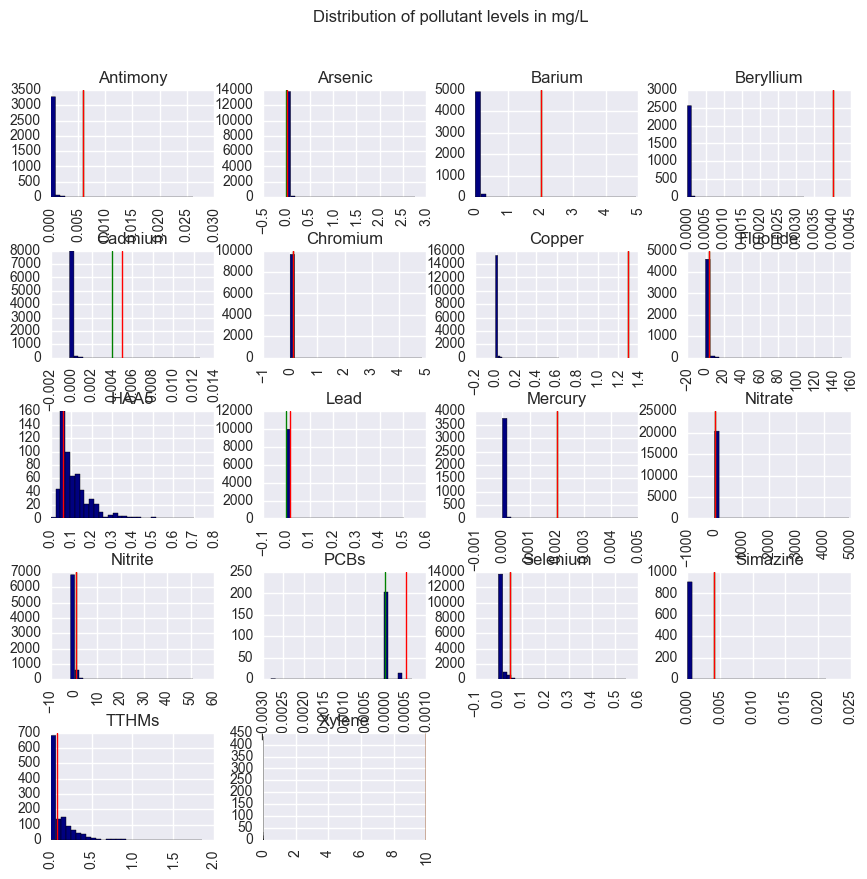

In [9]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data.hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=30, color='navy')
_ = plt.suptitle('Distribution of pollutant levels in mg/L')
drawlimits()

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:2908: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


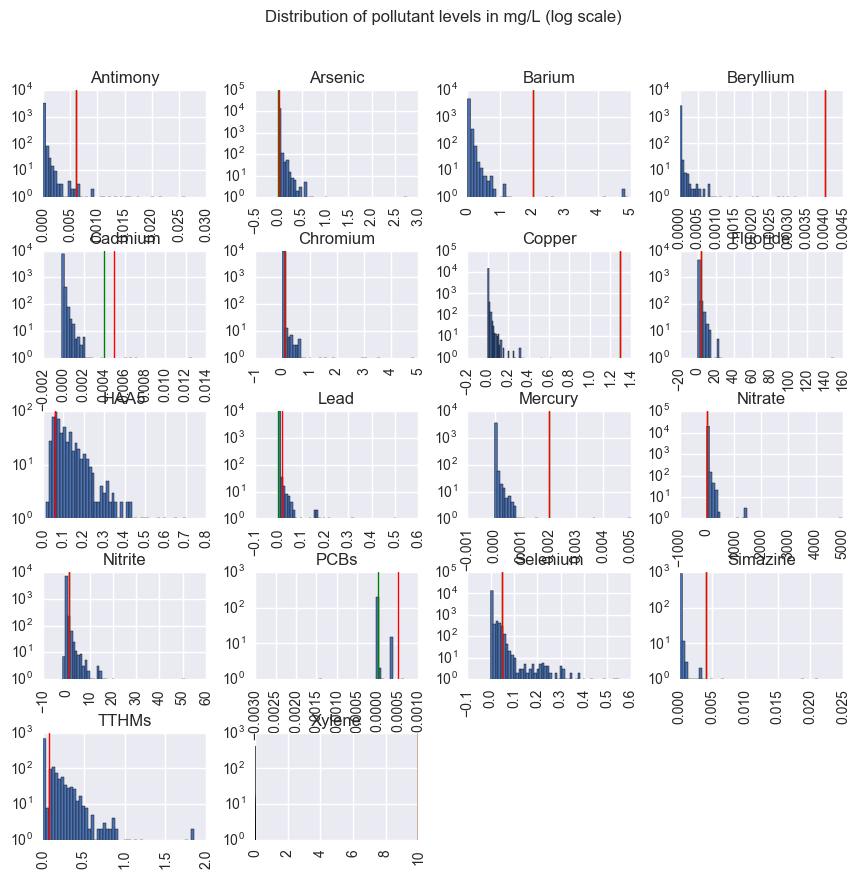

In [10]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data.hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50, log=True)
_ = plt.suptitle('Distribution of pollutant levels in mg/L (log scale)')
drawlimits()

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:2908: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


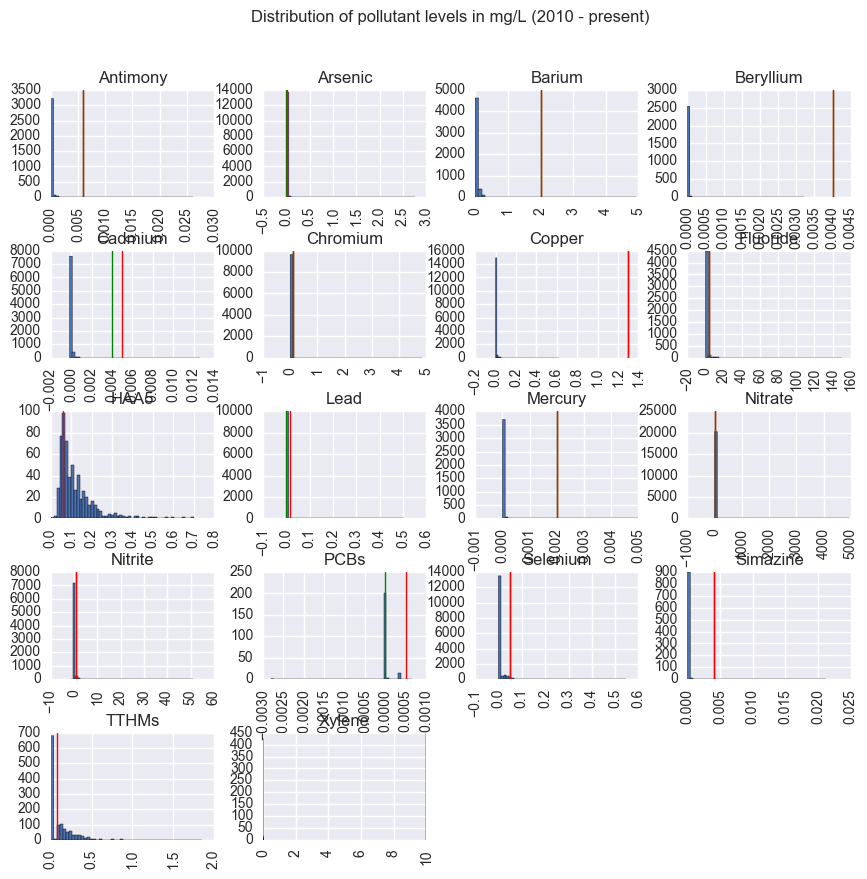

In [11]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data[data.StartDate >= '2010-01-01']\
    .hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50)
_ = plt.suptitle('Distribution of pollutant levels in mg/L (2010 - present)')
drawlimits()

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:2908: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


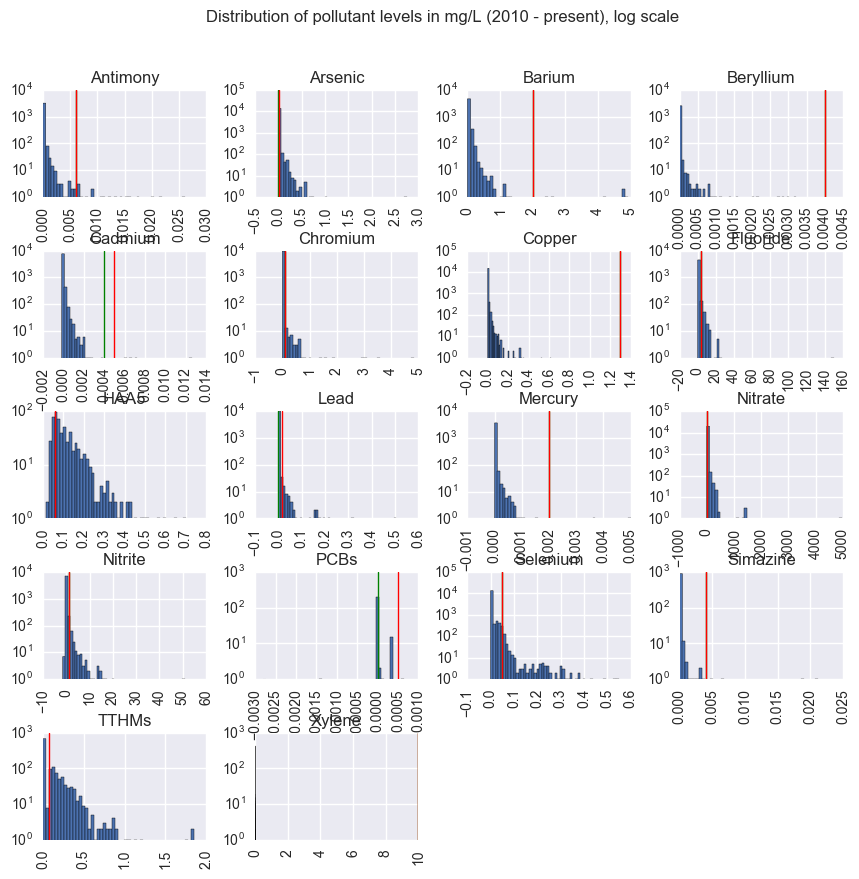

In [12]:
fix,ax = plt.subplots(figsize=(10, 10))
plot = data[data.StartDate >= '2010-01-01']\
    .hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50, log=True)
_ = plt.suptitle('Distribution of pollutant levels in mg/L (2010 - present), log scale')
drawlimits()

/Users/Sean/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:2908: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


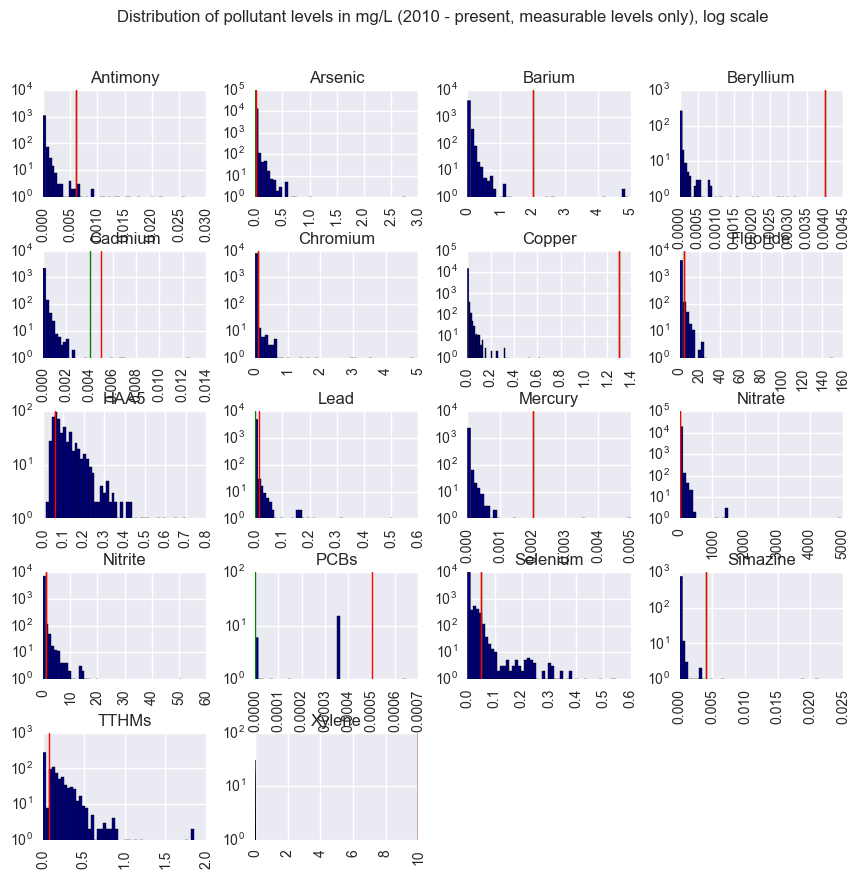

In [13]:
fig,ax = plt.subplots(figsize=(10, 10))
plot = data[(data.StartDate >= '2010-01-01') & (data.Value > 0)]\
    .hist(column='Value', by='Pollutant', grid=None, ax=ax, bins=50, log=True, color='navy')
_ = plt.suptitle('Distribution of pollutant levels in mg/L (2010 - present, measurable levels only), log scale')
_ = ax.get_xaxis().set_visible(False)
drawlimits()

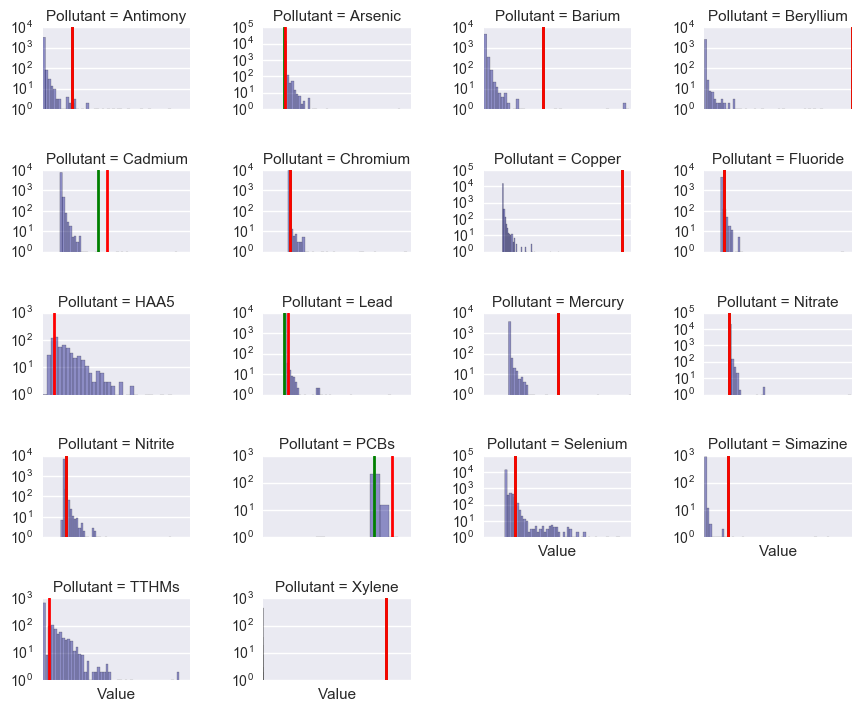

In [14]:
grid = sns.FacetGrid(data[data.StartDate >= '2010-01-01'], 
                     col='Pollutant', col_wrap=4, sharex=False, sharey=False,
                    size=1.5, aspect=1.5,
                    col_order=mcls.Pollutant)
plot = grid.map(sns.distplot, 'Value', kde=False, hist_kws = {'log': True}, color='navy')

for i,row in mcls.iterrows():
    plot.axes[i].axvline(row.MCLG, color='g', linewidth=2)
    plot.axes[i].axvline(row.MCL, color='r', linewidth=2)
    
_ = grid.set(xticks = [])


## Distribution of measurements by year

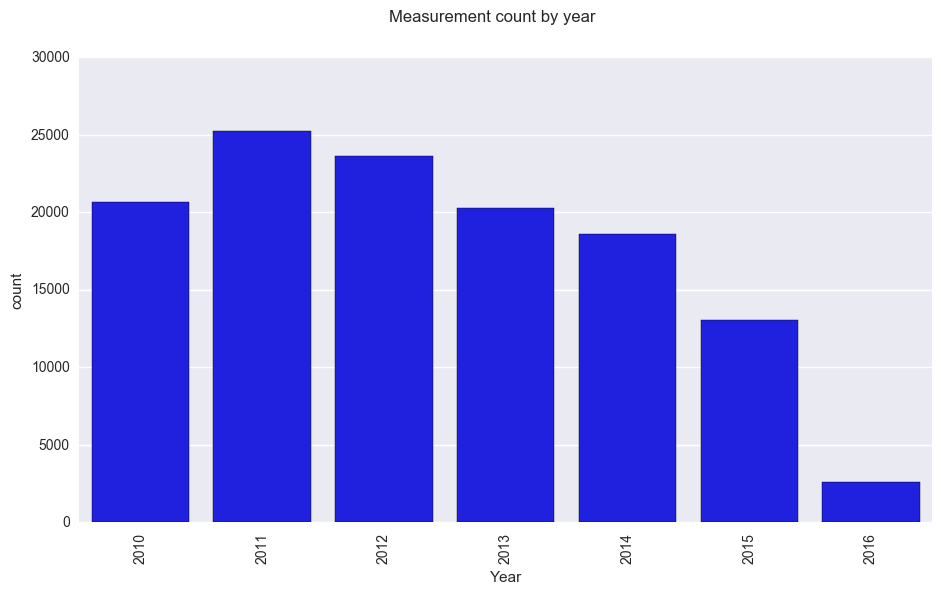

In [20]:
data['Year'] = data.StartDate.str.split('-').str[0]


plt.figure(figsize=[11,6])
sns.countplot(data[data.Year >= '1930'].Year, color='b')
_ = plt.suptitle('Measurement count by year')

locs, labels = plt.xticks(rotation=90)
# for l in labels:
#     val = int(l.get_text())
#     if val % 10 != 0:
#         l.set_visible(False)


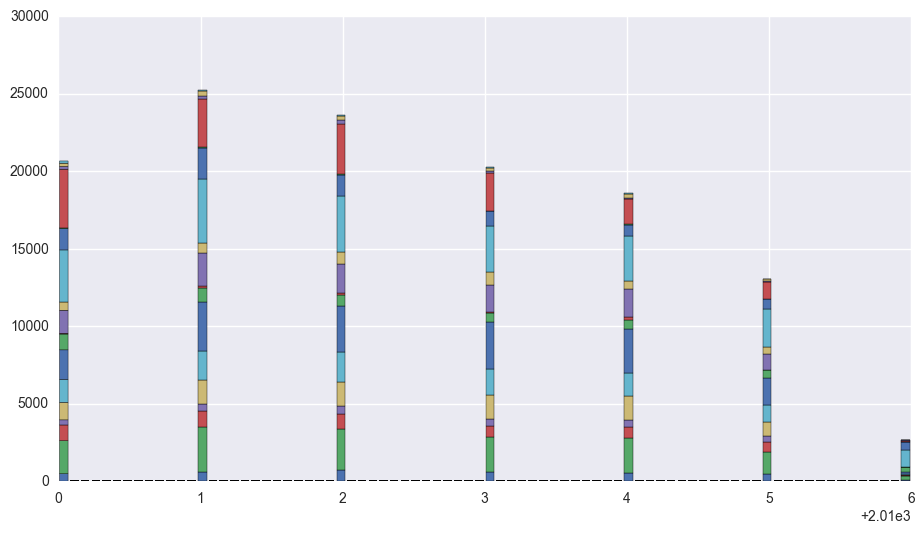

In [16]:
# grid = sns.FacetGrid(data[data.Year>= '1930'], hue='Pollutant', size=5)
# grid.map(sns.countplot, 'Year')
# _ = plt.suptitle('Measurement count by year')

# plt.hist(data[data.Year >= '1930'].Year, histtype='barstacked')
def stackhist(x, y, **kws):
    grouped = pd.groupby(x, y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, histtype='barstacked', label=labels, bins=80)

plt.figure(figsize=[11,6])

d = data[data.Year >= '1930']
stackhist(pd.to_numeric(d.Year), d.Pollutant)
# locs, labels = plt.xticks(rotation=90)
# for l in labels:
#     val = int(l.get_text())
#     if val % 10 != 0:
#         l.set_visible(False)


## Annual means and medians over time

In [17]:
annualMeans = data.groupby(['Pollutant', 'TypeGroup', 'Year']).mean()['Value'].reset_index()
maxes = annualMeans.groupby(['Pollutant']).max()['Value'].reset_index()
maxes.columns = ['Pollutant', 'MaxValue']
annualMeans = pd.merge(annualMeans, maxes, on='Pollutant')
annualMeans['% of maximum'] = annualMeans.Value / annualMeans.MaxValue
annualMeans.describe()

,Value,MaxValue,% of maximum
count,392.000000,392.000000,392.000000
mean,0.612498,2.387782,0.226974
std,2.625004,6.558867,0.296334
min,-0.000554,0.000089,-1.582614
25%,0.000129,0.002622,0.030603
50%,0.002103,0.019235,0.109320
75%,0.047759,0.150230,0.326650
max,22.047826,22.047826,1.000000


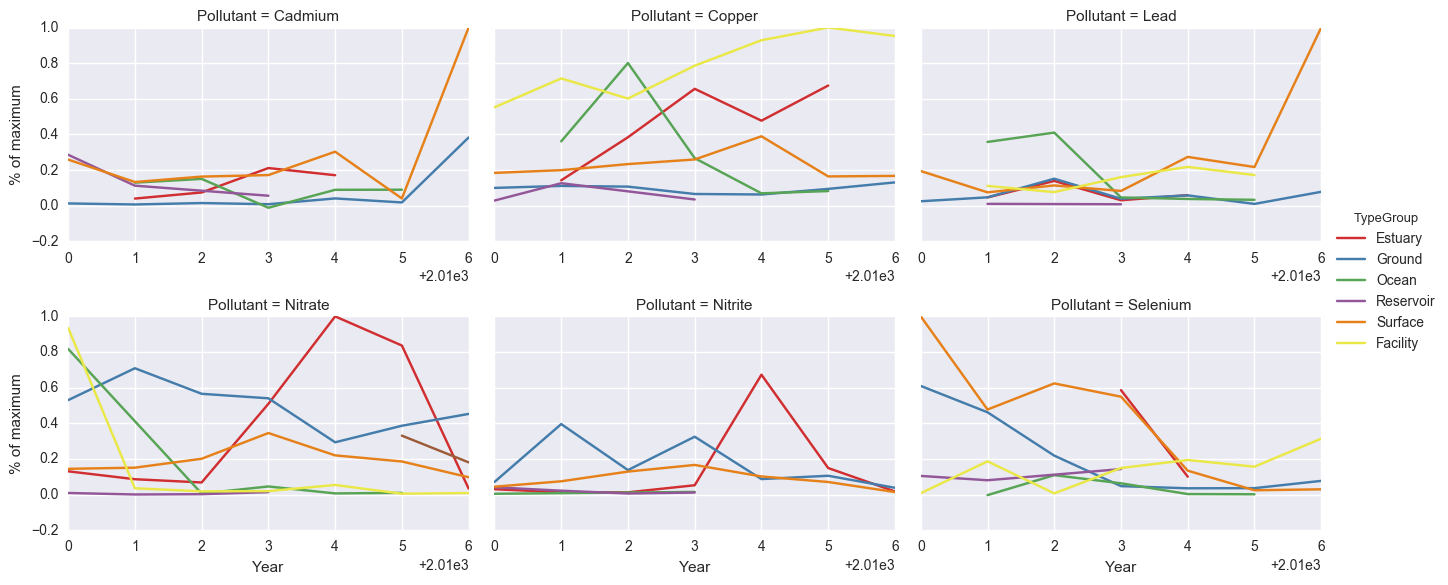

In [18]:
numcols = len(annualMeans.TypeGroup.unique())
# print(numcols)
pal = sns.color_palette('Set1', numcols, desat=.8)
# sns.palplot(pal)
sns.set_palette(pal)

grid=sns.FacetGrid(annualMeans[annualMeans.Pollutant.isin(['Cadmium', 'Copper', 'Lead', 'Nitrate', 'Nitrite', 'Selenium'])], 
                   col='Pollutant', hue='TypeGroup', 
                   col_wrap=3, sharex=False, size=3, aspect=1.5, palette=pal)
_ = grid.map(plt.plot, 'Year', '% of maximum').add_legend()


## Heatmap by pollutant type

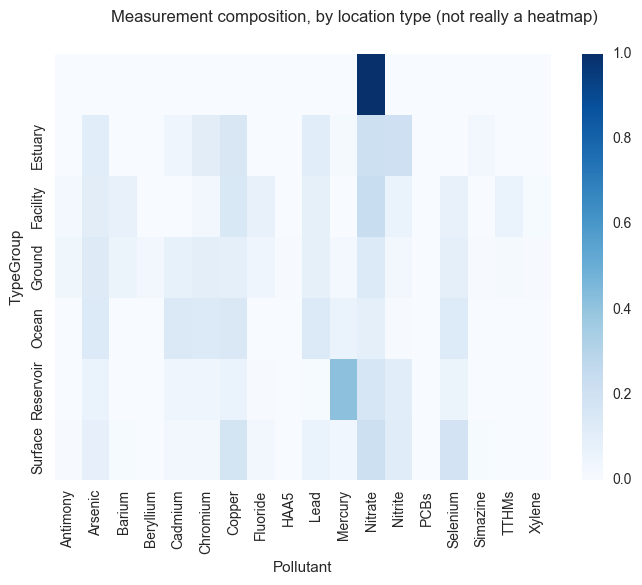

In [19]:
from matplotlib.colors import LogNorm
xtab = pd.crosstab(data.TypeGroup, data.Pollutant)
xtab.sum(axis=1)
_ = sns.heatmap(xtab.div(xtab.sum(axis=1), axis=0), cmap='Blues')
_ = plt.suptitle('Measurement composition, by location type (not really a heatmap)')

